In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plot
from c_statistic import binned_data

In [8]:
g_table = pd.read_csv('../Output/Task2_step4.csv')
g_table.head()

,participant_ID,treatment,part,trial_no,setup_cost_red,setup_cost_blue,red_prior_prob,current_rounds,action_type,suspect,count_red_samples,count_blue_samples,evidence_found,evidence_suspect,posterior,true_guilty_suspect,suspect_accused,time
0,1.0,1.0,2.0,1.0,10.0,10.0,0.1,1,1,0.0,0,0,0,-1.0,0.100000,0.0,0.0,4753.3628
1,1.0,1.0,2.0,2.0,5.0,5.0,0.9,1,1,1.0,0,0,0,-1.0,0.900000,1.0,1.0,2152.3981
2,1.0,1.0,2.0,3.0,40.0,40.0,0.5,1,0,0.0,0,0,0,-1.0,0.500000,1.0,1.0,2502.5501
3,1.0,1.0,2.0,3.0,40.0,40.0,0.5,2,0,0.0,1,0,0,-1.0,0.428571,1.0,1.0,3686.2815
4,1.0,1.0,2.0,3.0,40.0,40.0,0.5,3,1,1.0,2,0,1,1.0,1.000000,1.0,1.0,5353.5514


In [9]:
n_bins = 10
action = g_table.loc[(g_table['action_type'] == 1)]
action = action.reset_index(drop = True)
sus_avg_b = np.array(binned_data(action, n_bins))
error_b = [np.std(sus_avg_b/np.sqrt(len(sus_avg_b)))]*n_bins

action = g_table.loc[(g_table['action_type'] == 1) & (g_table['red_prior_prob'] < 0.5)]
action = action.reset_index(drop = True)
sus_avg_r = np.array(binned_data(action, n_bins))
error_r = [np.std(sus_avg_r/np.sqrt(len(sus_avg_r)))]*n_bins

action = g_table.loc[(g_table['action_type'] == 1) & (g_table['red_prior_prob'] > 0.5)]
action = action.reset_index(drop = True)
sus_avg_u = np.array(binned_data(action, n_bins))
error_u = [np.std(sus_avg_u/np.sqrt(len(sus_avg_u)))]*n_bins

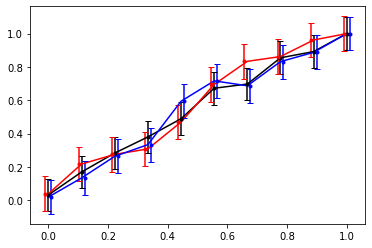

In [10]:
plt.plot(np.linspace(0, 1, n_bins), sus_avg_b, 'black')
plt.errorbar(np.linspace(0, 1, n_bins), sus_avg_b , yerr=error_b, fmt='.', color='black', capsize=3);
plt.plot(np.linspace(0, 1, n_bins),sus_avg_r, 'red')
plt.errorbar(np.linspace(0, 1, n_bins)-0.01, sus_avg_r , yerr=error_r, fmt='.', color='red', capsize=3);
plt.plot(np.linspace(0, 1, n_bins),sus_avg_u, 'blue')
plt.errorbar(np.linspace(0, 1, n_bins)+0.01, sus_avg_u , yerr=error_u, fmt='.', color='blue', capsize=3);
plt.show()

In [11]:
df = pd.read_csv('../Output/Task2_step4.csv')
costs = list(set(df['setup_cost_red'].to_list()))
costs.sort()
heatmap = []
for i in costs:
    temp = []
    for j in [0.1,0.3,0.5,0.7,0.9]:
        df_sub = df.loc[(df['setup_cost_red'] == i) & (df['red_prior_prob'] == j)]
        df_first = df_sub.loc[(df_sub['current_rounds'] == 1) & (df_sub['action_type'] == 1)]
        temp.append(len(df_first)/len(df_sub))
    heatmap.append(temp)
costs.reverse()

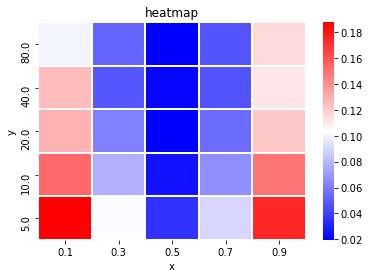

In [12]:
plot.heatmap('heatmap', heatmap, 'x', 'y', colors='bwr', xtick=[0.1,0.3,0.5,0.7,0.9], ytick = costs)